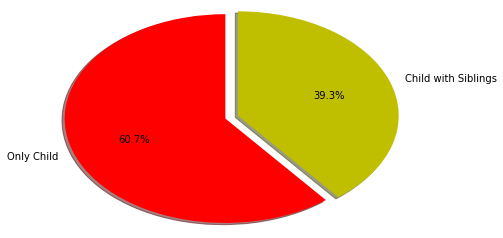

Only Child : 0.7142857142857143
Child with Siblings : 0.46153846153846156


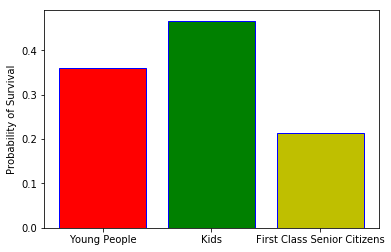

Young People : 0.35987261146496813
Kids : 0.4666666666666667
First Class Senior Citizens : 0.21428571428571427


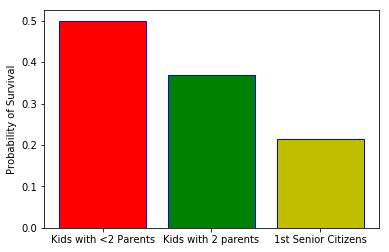

Kids with <2 Parents : 0.5
Kids with 2 parents : 0.3684210526315789
1st Senior Citizens : 0.21428571428571427


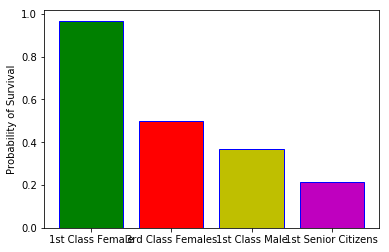

1st Class Female : 0.9680851063829787
3rd Class Females : 0.5
1st Class Male : 0.36885245901639346
1st Senior Citizens : 0.21428571428571427


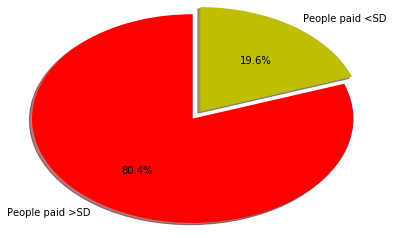

People paid >SD : 0.804093567251462
People paid <SD : 0.195906432748538


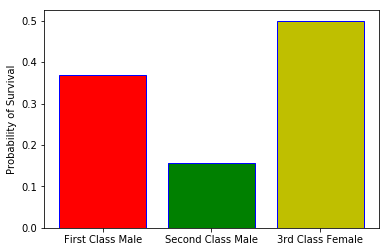

First Class Male : 0.36885245901639346
Second Class Male : 0.1574074074074074
3rd Class Female : 0.5


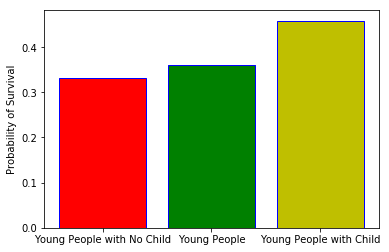

Young People with No Child : 0.332703213610586
Young People : 0.35987261146496813
Young People with Child : 0.4585635359116022


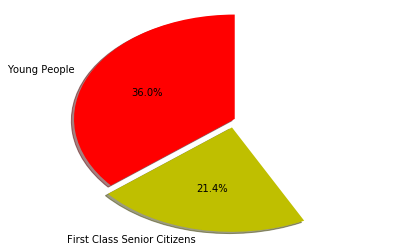

Young People : 0.35987261146496813
First Class Senior Citizens : 0.21428571428571427


In [4]:

# Importing the libraries
import numpy as np
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('train.csv')
y=dataset.Survived
dataset.drop(labels=['PassengerId','Name','Survived','Cabin' , 'Ticket'],axis=1,inplace=True)

# Adding missing values
dataset.iloc[:,6].fillna('S' , inplace = True)
dataset.iloc[: , 2].fillna(dataset.Age.mean() , inplace = True)
X=dataset.values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 6] = labelencoder_X_1.fit_transform(X[:,6])
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:,1])
labelencoder_X_1 = LabelEncoder()
X[:, 5] = labelencoder_X_1.fit_transform(X[:,5])



# Seperating differnrt catogories
total_serv = y.sum()
FirstClassFemale = np.all([X[: , 0] == 1 , X[: , 1] < 1] , axis = 0)
OtherFemales = np.all([X[: , 1] == 0 , X[: , 0] != 1] , axis = 0)
ThirdClassFemales = np.all([X[: , 0] == 3 , X[: , 1] == 0] , axis = 0)
FirstClassMale = np.all([X[: , 0] == 1 , X[: , 1] == 1 ] , axis = 0)
SecondClassMale = np.all([X[: , 0] == 2 , X[: , 1] == 1] , axis = 0)
YoungPeople = np.all([X[: , 2] >= 18 , X[: , 2] <= 40] , axis = 0)
YoungPeopleNoChild = np.all([YoungPeople , X[: , 4] == 0 ] , axis = 0)
YoungPeopleWithChild = ~YoungPeopleNoChild
FirstClassSeniorCitizens = np.all([X[: , 2] > 60 , X[: , 0] == 1] , axis = 0)
OtherSeniorCitizens = np.all([X[: , 2] > 60 ,  X[: , 0] != 1] , axis = 0)
KidWithTwoParent = np.all([X[: , 2] >= 5 , X[: , 2] <= 16 , X[: , 4] == 2] , axis = 0)
OtherKid = np.all([X[: , 2] >= 5 , X[: , 2] <= 16 , X[: , 4] == 1] , axis = 0)
OnlyChild = np.all([X[: , 2] <= 16 , X[: , 3] == 0 ] , axis = 0)
MoreChild = np.all([X[: , 2] <= 16 , X[: , 3] > 0 ] , axis = 0)
Kids = np.all([X[: , 2] >= 5 , X[: , 2] <= 16] , axis = 0)
ThirdClassKid = np.all([X[: , 0] == 3 , X[: , 2] >= 5 , X[: , 2] <= 16] , axis = 0)
PaidMoreThanSD = X[: , 5] > np.std(X[: , 5])


# Finding Probability of survival

"""     Probability of Only Child over Child With Siblings     """
OC = (OnlyChild & y).sum() / OnlyChild.sum()
CWS = (MoreChild & y).sum() / MoreChild.sum()


"""     Probability of Young People over Kids   """
YP = (YoungPeople & y).sum() / YoungPeople.sum()
K = (Kids & y).sum() / Kids.sum()


"""     Probability of Kids with One or No Parents over Kids with Two parents    """
KTP = (KidWithTwoParent & y).sum() / KidWithTwoParent.sum()
OK = (OtherKid & y).sum() / OtherKid.sum()


"""     Probability of First Class Female over Third Class Females    """
FCF = (FirstClassFemale & y).sum() / FirstClassFemale.sum()
TCF = (ThirdClassFemales & y).sum() / ThirdClassFemales.sum()

"""     Probability of People Paid More Than Standard deviation over Others    """
PMSD = (PaidMoreThanSD & y).sum() / total_serv
PLSD = (~PaidMoreThanSD & y).sum() / total_serv



"""     Probability of First Class Male over Second Class Male    """
FCM = (FirstClassMale & y).sum() / FirstClassMale.sum()
SCM = (SecondClassMale & y).sum() / SecondClassMale.sum()


"""     Probability of Young People with No Child over Young People with Children  """
YPC = (YoungPeopleWithChild & y).sum() / YoungPeopleWithChild.sum()
YPN = (YoungPeopleNoChild & y ).sum() / YoungPeopleNoChild.sum()


"""     Probability of Young People over First Class Senior Citizens  """
YP = (YoungPeople & y).sum() / YoungPeople.sum()
FCSC = (FirstClassSeniorCitizens & y).sum() / FirstClassSeniorCitizens.sum()



# Visualisation of the result
import matplotlib.pyplot as plt 
 
activities = ['Only Child', 'Child with Siblings'] 
slices = [OC,CWS] 
colors = ['r', 'y']  
plt.pie(slices, labels = activities, colors=colors,  
        startangle=90, shadow = True, explode = (0,0.10), 
        radius = 1.2, autopct = '%1.1f%%') 
plt.show() 
for i,a in enumerate(activities):
    print(a,':',slices[i])
    
    
left = [1, 2, 3]   
height = [YP , K , FCSC] 
tick_label = ['Young People', 'Kids' , 'First Class Senior Citizens'] 
plt.bar(left, height, tick_label = tick_label, 
width = 0.8, color = ['red', 'green' , 'y'] , edgecolor = 'b') 
plt.ylabel('Probability of Survival')  
plt.show() 
for i,a in enumerate(tick_label):
    print(a,':',height[i])
    
left = [1, 2, 3] 
tick_label = ['Kids with <2 Parents', 'Kids with 2 parents' , '1st Senior Citizens'] 
height = [OK, KTP , FCSC] 
colors = ['g', 'r' , 'y']
plt.bar(left, height, tick_label = tick_label, 
width = 0.8, color = ['red', 'green' , 'y'] , edgecolor = 'b') 
plt.ylabel('Probability of Survival')  
plt.show()

for i,a in enumerate(tick_label):
    print(a,':',height[i])
    
left = [1, 2, 3 ,4] 
tick_label = ['1st Class Female', '3rd Class Females' , '1st Class Male' , '1st Senior Citizens'] 
height = [FCF, TCF , FCM , FCSC] 
color = ['g', 'r' , 'y' , 'm']
plt.bar(left, height, tick_label = tick_label, 
width = 0.8, color = color , edgecolor = 'b') 
plt.ylabel('Probability of Survival')  
plt.show()


for i,a in enumerate(tick_label):
    print(a,':',height[i])

    
activities = ['People paid >SD', 'People paid <SD'] 
slices = [PMSD,PLSD] 
colors = ['r', 'y']  
plt.pie(slices, labels = activities, colors=colors,  
        startangle=90, shadow = True, explode = (0,0.10), 
        radius = 1.2, autopct = '%1.1f%%') 
plt.show()
for i,a in enumerate(activities):
    print(a,':',slices[i])

    
left = [1, 2, 3]   
height = [FCM , SCM , TCF] 
tick_label = ['First Class Male' ,'Second Class Male', '3rd Class Female'] 
plt.bar(left, height, tick_label = tick_label, 
width = 0.8, color = ['red', 'green' , 'y'] , edgecolor = 'b') 
plt.ylabel('Probability of Survival')  
plt.show() 

for i,a in enumerate(tick_label):
    print(a,':',height[i])
  

left = [1, 2, 3]   
height = [YPN ,YP,YPC] 
tick_label =  ['Young People with No Child' , 'Young People', 'Young People with Child'] 
plt.bar(left, height, tick_label = tick_label, 
width = 0.8, color = ['red', 'green' , 'y'] , edgecolor = 'b') 
plt.ylabel('Probability of Survival')  
plt.show() 

for i,a in enumerate(tick_label):
    print(a,':',height[i])
    
    
activities = ['Young People', 'First Class Senior Citizens'] 
slices = [YP,FCSC] 
colors = ['r', 'y']  
plt.pie(slices, labels = activities, colors=colors,  
        startangle=90, shadow = True, explode = (0,0.10), 
        radius = 1.2, autopct = '%1.1f%%') 
plt.show() 
for i,a in enumerate(activities):
    print(a,':',slices[i])





# conclusion 
1. Child with no brother/sister are more likely to survive by 71.4% compared to child with siblings/spouses.
2. Kids have highest chance of survival amoung young people and first class senior citizens.
3. Kids with one or no parents have 14% more chance of survival compared to kids with two parents onboard.
4. First class female have highest chance of survival with 96.8% as compared to third class females(50%), first class male(36.88%) and first class senior citizens(21.4%).
5. People how paid more than stantad deviation of ticket price have 80.4% chance of survival as compared to how paid less(19.5%).
6. Third class females(50%) have almost three times more chance of survival as compared to second class male(15.7%) and 14% more chance than first class males.
7. Young people with child are 10% more likely to survive than people with no child and 13% more as compared to all young people.
8. Young people are 15% more likely to survive than first class senior citizens.
